<a href="https://colab.research.google.com/github/BalytskyiJaroslaw/PathogensRamanOpenSet/blob/main/Obj_K_p1_I_p3_submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operating in the ***open*** world, Objectosphere, $\mathcal{K} = p_1$, $\mathcal{I} = p_3$

In [ ]:
from __future__ import absolute_import
from __future__ import print_function

import numpy as np
from numpy import genfromtxt
from sklearn.utils import shuffle


import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pandas import read_csv

from keras.layers import Lambda, Multiply

import csv
import pprint

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

import keras
#from keras.utils import to_categorical
from pandas import read_csv
from keras.models import Sequential
from keras import layers
#from keras.optimizers import SGD
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import SGD

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint

from sklearn.preprocessing import LabelEncoder
import gspread
import pandas as pd
import pickle
import pywt
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
#from keras.utils import to_categorical

from time import time
t00 = time()
import os
from tensorflow.keras import layers
from keras.layers import Input, Dense, concatenate
from keras.models import Model
from keras.layers import GlobalAveragePooling1D

In [ ]:
# Initialize the TPU and spread the computations across the 8 cores
import tensorflow as tf
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
tf.config.list_logical_devices('TPU')
#print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Reference dataset

In [ ]:
# Reference data
data_X_reference = np.load("/content/gdrive/MyDrive/Stanford_data/X_reference.npy")
# Test data
data_X_test = np.load("/content/gdrive/MyDrive/Stanford_data/X_test.npy")

data_y_reference = np.load("/content/gdrive/MyDrive/Stanford_data/y_reference.npy")
# Test labels
data_y_test = np.load("/content/gdrive/MyDrive/Stanford_data/y_test.npy")

data_y_reference_int = []

for i in range(data_y_reference.shape[0]):
  data_y_reference_int.append(int(data_y_reference[i]))

data_y_test_int = []

for i in range(data_y_test.shape[0]):
  data_y_test_int.append(int(data_y_test[i]))

train_label = tf.keras.utils.to_categorical(data_y_reference_int)
test_label = tf.keras.utils.to_categorical(data_y_test_int)

# $\mathcal{K} = p_1$, reference indices, training dataset: 18000 - 26000, 34000 - 38000, 44000 - 50000,56000 - 58000. $\mathcal{I} = p_3$, reference indices: 10000 - 14000, 26000 - 28000, 42000 - 44000, 58000 - 60000.

In [ ]:
indices =[slice(18000, 26000),slice(34000, 38000),slice(44000, 50000),slice(56000, 58000),slice(10000, 14000),slice(26000, 28000),slice(42000, 44000),slice(58000, 60000)]

Known_and_Ignored_data_X_reference = np.concatenate([data_X_reference[idx, :] for idx in indices], axis=0)

Known_and_Ignored_data_X_train_label_int = []

for i in range(2000*10):
  Known_and_Ignored_data_X_train_label_int.append(int(data_y_reference[i]))

for i in range(2000*5):
 Known_and_Ignored_data_X_train_label_int.append(int(data_y_reference[2000*10]))

Known_and_Ignored_data_X_train_label = tf.keras.utils.to_categorical(Known_and_Ignored_data_X_train_label_int)
print("Shape of the known and ignored data, reference:", Known_and_Ignored_data_X_reference.shape)
print("Shape of the known and ignored labels, reference:", Known_and_Ignored_data_X_train_label.shape)

Shape of the known and ignored data, reference: (30000, 1000)
Shape of the known and ignored labels, reference: (30000, 11)


# $\mathcal{K}$, known reference indices for the ***test***: 900 - 1300, 1700 - 1900, 2200 - 2500, 2800 - 2900. Ignored, ***test***: 500 - 700, 1300 - 1400, 2100 - 2200, 2900 - 3000.


In [ ]:
indices =[slice(900, 1300),slice(1700, 1900),slice(2200, 2500),slice(2800, 2900),slice(500, 700),slice(1300, 1400),slice(2100, 2200),slice(2900, 3000)]

Known_and_Ignored_data_X_test = np.concatenate([data_X_test[idx, :] for idx in indices], axis=0)

Known_and_Ignored_data_X_test_label_int = []

for i in range(100*10):
  Known_and_Ignored_data_X_test_label_int.append(int(data_y_test[i]))

for i in range(100*5):
  Known_and_Ignored_data_X_test_label_int.append(int(data_y_test[100*10]))

Known_and_Ignored_data_X_test_label = tf.keras.utils.to_categorical(Known_and_Ignored_data_X_test_label_int)
print("Shape of the known and ignored data, reference:", Known_and_Ignored_data_X_test.shape)
print("Shape of the known and ignored labels, reference:", Known_and_Ignored_data_X_test_label.shape)

Shape of the known and ignored data, reference: (1500, 1000)
Shape of the known and ignored labels, reference: (1500, 11)


# Leave only $\mathcal{K}$ samples to test the accuracy. This is done to keep the right shape of the labels.

In [ ]:
Known_data_X_test = Known_and_Ignored_data_X_test[:-100*5]
Known_data_X_test_label = Known_and_Ignored_data_X_test_label[:-100*5]
print("Shape of the known and ignored data, reference:", Known_data_X_test.shape)
print("Shape of the known and ignored labels, reference:", Known_data_X_test_label.shape)

Shape of the known and ignored data, reference: (1000, 1000)
Shape of the known and ignored labels, reference: (1000, 11)


# Defining the $\mathcal{K}$ labels

In [ ]:
KnownLabels = []
# 0 - 5
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 0*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 1*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 2*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 3*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 4*2000])

# 6 - 10
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 5*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 6*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 7*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 8*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 9*2000])

Ignored_label = Known_and_Ignored_data_X_train_label[1 + 10*2000]

In [ ]:
KnownLabels

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)]

# The ignored label $\mathcal{I}$ is:

In [ ]:
Ignored_label

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Never seen before samples, $\mathcal{N}$, first seen during the test: 0 - 500, 700 - 900, 1900 - 2100, 2500 - 2600.

In [ ]:
indices = [slice(0, 500),slice(700, 900),slice(1900, 2100),slice(2500, 2600)]
NeverSeen_data_X_test = np.concatenate([data_X_test[idx, :] for idx in indices], axis=0)

print("Shape of the NeverSeen data, test:", NeverSeen_data_X_test.shape)

Shape of the NeverSeen data, test: (1000, 1000)


# Data for finetuning

In [ ]:
# Finetuning
data_X_finetune = np.load("/content/gdrive/MyDrive/Stanford_data/X_finetune.npy")
# Test data
data_X_test = np.load("/content/gdrive/MyDrive/Stanford_data/X_test.npy")

data_y_finetune = np.load("/content/gdrive/MyDrive/Stanford_data/y_finetune.npy")
# Test labels
data_y_test = np.load("/content/gdrive/MyDrive/Stanford_data/y_test.npy")

data_y_finetune_int = []

for i in range(data_y_finetune.shape[0]):
  data_y_finetune_int.append(int(data_y_finetune[i]))

data_y_test_int = []

for i in range(data_y_test.shape[0]):
  data_y_test_int.append(int(data_y_test[i]))

train_label = tf.keras.utils.to_categorical(data_y_finetune_int)
test_label = tf.keras.utils.to_categorical(data_y_test_int)

#data_X_finetune, train_label = shuffle(data_X_finetune, train_label)



Known data, $\mathcal{K}$, for the finetuning: 900 - 1300, 1700 - 1900, 2200 - 2500, 2800 - 2900. Ignored samples, $\mathcal{I}$, finetuning: 500 - 700, 1300 - 1400, 2100 - 2200, 2900 - 3000.

In [ ]:
indices =[slice(900, 1300),slice(1700, 1900),slice(2200, 2500),slice(2800, 2900),slice(500, 700),slice(1300, 1400),slice(2100, 2200),slice(2900, 3000)]

Known_and_Ignored_data_X_finetune = np.concatenate([data_X_finetune[idx, :] for idx in indices], axis=0)

Known_and_Ignored_data_X_finetune_label_int = []

for i in range(100*10):
  Known_and_Ignored_data_X_finetune_label_int.append(int(data_y_finetune[i]))

for i in range(100*5):
  Known_and_Ignored_data_X_finetune_label_int.append(int(data_y_finetune[100*10]))

Known_and_Ignored_data_X_finetune_label = tf.keras.utils.to_categorical(Known_and_Ignored_data_X_finetune_label_int)

print("Shape of the known and ignored data, finetune:", Known_and_Ignored_data_X_finetune.shape)
print("Shape of the known and ignored labels, finetune:", Known_and_Ignored_data_X_finetune_label.shape)

Shape of the known and ignored data, finetune: (1500, 1000)
Shape of the known and ignored labels, finetune: (1500, 11)


# Uploading the libraries

In [ ]:
# Create a checkpoint directory to store the checkpoints.
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

import numpy as np
import pandas as pd
import seaborn as sns
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense, GlobalAveragePooling1D, GlobalMaxPooling1D, Multiply, Conv1DTranspose, LeakyReLU, Dropout
from keras.models import Model, model_from_json
#from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
sns.set_theme(style="whitegrid")

# Defining our model

In [ ]:
# Constants
NoF = 64  # Number of filters in the first convolutional layer
SE_RATIO = 16  # Squeeze-and-Excitation ratio

initializer = tf.keras.initializers.GlorotUniform(seed=0)
initializer2 = tf.keras.initializers.HeUniform(seed=0)

def squeeze_excitation_block(X, ratio=16):
    num_channels = X.shape[-1]
    se = tf.keras.layers.GlobalAveragePooling1D()(X)
    se = tf.keras.layers.Reshape((1, num_channels))(se)
    se = tf.keras.layers.Dense(num_channels // ratio, activation='relu', kernel_initializer=initializer)(se)
    se = tf.keras.layers.Dense(num_channels, activation='sigmoid', kernel_initializer=initializer)(se)
    return tf.keras.layers.Multiply()([X, se])


from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, Add
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers

initializer = tf.keras.initializers.GlorotUniform(seed=0)
initializer2 = tf.keras.initializers.HeUniform(seed=0)
Stride=1

def identity_block(X, f, filters, stage, block):

  #defining name basis
  ConvNameBase = 'res' + str(stage) + block + '_branch'
  BatchNormBase = 'bn' + str(stage) + block + '_branch'

  #retrieve filters
  F1,F2,F3 = filters

  #save the input value. You'll need this later to add back the main path
  x_shortcut = X

  ### First component of the main path ###
  X = tf.keras.layers.Conv1D(filters=F1, kernel_size=1, strides=Stride, padding='same',
             kernel_initializer=initializer#, name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  ### Second component of main path ###
  X = tf.keras.layers.Conv1D(filters=F2, kernel_size=f, strides=Stride, padding='same',
             kernel_initializer=initializer, #name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  #Third Component of main path
  X = tf.keras.layers.Conv1D(filters=F3, kernel_size=1, strides=Stride, padding='same',
             kernel_initializer=initializer#,name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)

  #Final step: add shortcut to the main path, and pass it through ReLU activation
  X = tf.keras.layers.Add()([X, x_shortcut])
  X = tf.keras.layers.Activation('relu')(X)

  return X

def convolutional_block(X, f, filters, stage, block, s=2):

  #Defining name bases
  ConvNameBase = 'res' + str(stage) + block + '_branch'
  BatchNormBase = 'res' + str(stage) + block + '_branch'

  #retrive n_filters
  F1, F2, F3 = filters

  #Save the input value
  x_shortcut = X

  #First component of the main path
  X = tf.keras.layers.Conv1D(F1, strides=s, kernel_size=f, kernel_initializer=initializer,
             padding='same'#, name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  #Second Component of main path
  X = tf.keras.layers.Conv1D(filters=F2, kernel_size=f, strides=Stride, padding='same',
             kernel_initializer=initializer#, name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  #Third component of main path
  X = tf.keras.layers.Conv1D(filters=F3, kernel_size=f, strides=Stride, padding='same',
             kernel_initializer=initializer, name=ConvNameBase)(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
  )(X)

  ###### SHORTCUT PATH ######
  x_shortcut = tf.keras.layers.Conv1D(filters = F3, kernel_size=1, strides=s,
                      padding='same', #name=ConvNameBase,
                      kernel_initializer=initializer)(x_shortcut)
  x_shortcut = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                                  )(x_shortcut)

  #Add shortcut to main path and pass in through ReLU activation
  X = tf.keras.layers.Add()([X, x_shortcut])
  X = tf.keras.layers.Activation('relu')(X)

  return X

def create_model():
    input_shape = (1000, 1)
    nb_classes = 10 + 1

    x_input = tf.keras.layers.Input(input_shape)
    X = tf.keras.layers.ZeroPadding1D(padding=3)(x_input)

    X = tf.keras.layers.Conv1D(NoF, kernel_size=7, strides=2, name='Convolution1',
                               kernel_initializer=initializer)(X)
    X = tf.keras.layers.BatchNormalization(name="BatchNormStage1")(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.MaxPooling1D(3, strides=2)(X)

    X = convolutional_block(X, f=3, filters=[NoF, NoF, NoF * 4], stage=2, block='a', s=1)
    X = identity_block(X, 3, [NoF, NoF, NoF * 4], stage=2, block='b')

    X = convolutional_block(X, f=3, filters=[NoF * 2, NoF * 2, NoF * 8], stage=3, block='a')
    X = identity_block(X, 3, [NoF * 2, NoF * 2, NoF * 8], stage=3, block='b')

    X = convolutional_block(X, f=3, filters=[NoF * 4, NoF * 4, NoF * 16], stage=4, block='a')
    X = identity_block(X, 3, [NoF * 4, NoF * 4, NoF * 16], stage=4, block='b')

    X = convolutional_block(X, f=3, filters=[NoF * 4, NoF * 4, NoF * 32], stage=5, block='a')
    X = identity_block(X, f=3, filters=[NoF * 4, NoF * 4, NoF * 32], stage=5, block='b')

    # Applying SE mechanism before transposed convolutional layers
    X = squeeze_excitation_block(X)

    # Adding transposed convolutional layers
    X = Conv1DTranspose(filters=NoF, kernel_size=3, strides=2, padding='same', kernel_initializer=initializer)(X)
    X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,)(X)
    X = LeakyReLU(alpha=0.2)(X)

    X = Flatten()(X)

    # Adding dropout regularization
    X = Dropout(0.5)(X)

    F = tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),use_bias=None,activity_regularizer=regularizers.l2(1e-5))(X)

    Y = tf.keras.layers.Dense(nb_classes, activation='softmax',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5))(F)

    res_net = tf.keras.Model(inputs = x_input, outputs = [Y,F], name='Combined')

    return res_net

model = create_model()
model.summary()

Model: "Combined"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1000, 1)]            0         []                            
                                                                                                  
 zero_padding1d (ZeroPaddin  (None, 1006, 1)              0         ['input_1[0][0]']             
 g1D)                                                                                             
                                                                                                  
 Convolution1 (Conv1D)       (None, 500, 64)              512       ['zero_padding1d[0][0]']      
                                                                                                  
 BatchNormStage1 (BatchNorm  (None, 500, 64)              256       ['Convolution1[0][0]'] 

In [ ]:
with strategy.scope():

  # By N_classes, I mean classes of interest.
  N_classes = 10

  # Additional contribution

  def additional(target,output):

    Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
    Try = tf.math.square(output)
    Try = tf.math.reduce_sum(Try,axis=-1,keepdims=True)

    Try = tf.math.multiply(Checker,Try)

    return Try

  def Open_set_categorical_crossentropy_trial_total(target,output):
    def Open_set_categorical_crossentropy_trial_first(target,output):
      output = tf.convert_to_tensor(output)
      target = tf.cast(target, target.dtype)

      epsilon = tf.keras.backend.epsilon()
      output = tf.clip_by_value(output, epsilon, 1. - epsilon)

      Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

      output = tf.math.divide(output, Sum)

      Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
      One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)

      output = - tf.math.reduce_sum(tf.math.multiply(target,tf.math.log(output)),axis=-1)
      output = tf.math.multiply(tf.math.subtract(One,Checker),output)

      return output

    def Open_set_categorical_crossentropy_trial_second(target,output):
      output = tf.convert_to_tensor(output)
      target = tf.cast(target, target.dtype)

      epsilon = tf.keras.backend.epsilon()
      output = tf.clip_by_value(output, epsilon, 1. - epsilon)

      Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

      output = tf.math.divide(output, Sum)

      Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
      One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)
      Zero = tf.math.reduce_sum(tf.math.multiply(KnownLabels[1], KnownLabels[2]),axis=-1)

      for i in range(N_classes):
        addon = - tf.math.reduce_sum(tf.math.multiply(KnownLabels[i], tf.math.log(output)),axis=-1)
        addon = tf.math.divide(addon,N_classes)
        Zero = tf.math.add(addon,Zero)
      Zero = tf.math.multiply(Checker, Zero)

      return Zero

    output1 = Open_set_categorical_crossentropy_trial_first(target,output)
    output2 = Open_set_categorical_crossentropy_trial_second(target,output)
    output3 = Open_set_categorical_crossentropy_trial_second(target,output)

    output = tf.math.add(output1,output2)
    output = tf.math.add(output,output3)

    return output

  res_net = create_model()

  optimizer = tf.keras.optimizers.Adam(learning_rate=.00001)

  checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=res_net)

  callbacks = [EarlyStopping(monitor='val_loss', patience=20, mode='min'), ModelCheckpoint('/content/gdrive/MyDrive/Stanford_data/01_Obj_K_p1_I_p3_sameAS.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
  res_net.compile(loss=[Open_set_categorical_crossentropy_trial_total, additional],loss_weights=[1., 0.0000000000000001],optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),metrics=None)

  Known_and_Ignored_data_X_reference, Known_and_Ignored_data_X_train_label = shuffle(Known_and_Ignored_data_X_reference,Known_and_Ignored_data_X_train_label)

  history = res_net.fit(Known_and_Ignored_data_X_reference, Known_and_Ignored_data_X_train_label, epochs=500, batch_size=32, verbose=1, validation_split=0.2, shuffle=True, callbacks=callbacks)

In [ ]:
res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/01_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #1", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/02_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #2", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/03_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #3", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/04_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #4", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/05_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #5", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/06_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #6", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/07_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #7", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/08_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #8", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/09_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #9", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/10_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #10", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/11_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #11", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/12_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #12", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/13_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #13", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/14_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #14", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/15_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #15", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/16_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #16", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/17_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #17", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/18_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #18", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/19_ObjK_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #19", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/20_Obj_K_p1_I_p3_sameAS.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #20", true/(Known_data_X_test_label.shape[0]))

32/32 [==============================] - 5s 113ms/step
Accuracy on the knowns, Run #1 0.53
32/32 [==============================] - 5s 113ms/step
Accuracy on the knowns, Run #2 0.581
32/32 [==============================] - 4s 111ms/step
Accuracy on the knowns, Run #3 0.573
32/32 [==============================] - 5s 112ms/step
Accuracy on the knowns, Run #4 0.568
32/32 [==============================] - 4s 112ms/step
Accuracy on the knowns, Run #5 0.589
32/32 [==============================] - 4s 108ms/step
Accuracy on the knowns, Run #6 0.602
32/32 [==============================] - 5s 111ms/step
Accuracy on the knowns, Run #7 0.57
32/32 [==============================] - 4s 112ms/step
Accuracy on the knowns, Run #8 0.578
32/32 [==============================] - 4s 114ms/step
Accuracy on the knowns, Run #9 0.569
32/32 [==============================] - 5s 115ms/step
Accuracy on the knowns, Run #10 0.571
32/32 [==============================] - 4s 112ms/step
Accuracy on the knowns, Ru

# Finetuning

In [ ]:
with strategy.scope():

  # By N_classes, I mean classes of interest.
  N_classes = 10

  # Additional contribution

  def additional(target,output):

    Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
    Try = tf.math.square(output)
    Try = tf.math.reduce_sum(Try,axis=-1,keepdims=True)

    Try = tf.math.multiply(Checker,Try)

    return Try

  def Open_set_categorical_crossentropy_trial_total(target,output):
    def Open_set_categorical_crossentropy_trial_first(target,output):
      output = tf.convert_to_tensor(output)
      target = tf.cast(target, target.dtype)

      epsilon = tf.keras.backend.epsilon()
      output = tf.clip_by_value(output, epsilon, 1. - epsilon)

      Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

      output = tf.math.divide(output, Sum)

      Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
      One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)

      output = - tf.math.reduce_sum(tf.math.multiply(target,tf.math.log(output)),axis=-1)
      output = tf.math.multiply(tf.math.subtract(One,Checker),output)

      return output

    def Open_set_categorical_crossentropy_trial_second(target,output):
      output = tf.convert_to_tensor(output)
      target = tf.cast(target, target.dtype)

      epsilon = tf.keras.backend.epsilon()
      output = tf.clip_by_value(output, epsilon, 1. - epsilon)

      Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

      output = tf.math.divide(output, Sum)

      Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
      One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)
      Zero = tf.math.reduce_sum(tf.math.multiply(KnownLabels[1], KnownLabels[2]),axis=-1)

      for i in range(N_classes):
        addon = - tf.math.reduce_sum(tf.math.multiply(KnownLabels[i], tf.math.log(output)),axis=-1)
        addon = tf.math.divide(addon,N_classes)
        Zero = tf.math.add(addon,Zero)
      Zero = tf.math.multiply(Checker, Zero)

      return Zero

    output1 = Open_set_categorical_crossentropy_trial_first(target,output)
    output2 = Open_set_categorical_crossentropy_trial_second(target,output)
    output3 = Open_set_categorical_crossentropy_trial_second(target,output)

    output = tf.math.add(output1,output2)
    output = tf.math.add(output,output3)

    return output

  res_net = create_model()

  optimizer = tf.keras.optimizers.Adam(learning_rate=.00001/10)

  checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=res_net)

  callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'), ModelCheckpoint('/content/gdrive/MyDrive/Stanford_data/01_Obj_K_p1_I_p3_sameAS_FTm3.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
  res_net.compile(loss=[Open_set_categorical_crossentropy_trial_total, additional],loss_weights=[1., 0.0000000000000001],optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),metrics=None)

  res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/01_Obj_K_p1_I_p3_sameAS.h5")

  for layer in res_net.layers[:-3]:
    layer.trainable = False

  Known_and_Ignored_data_X_finetune,Known_and_Ignored_data_X_finetune_label = shuffle(Known_and_Ignored_data_X_finetune,Known_and_Ignored_data_X_finetune_label)

  history = res_net.fit(Known_and_Ignored_data_X_finetune,Known_and_Ignored_data_X_finetune_label, epochs=1500, batch_size=128, verbose=1, validation_split=0.2, shuffle=True, callbacks=callbacks)

  res_net.save_weights('/content/gdrive/MyDrive/Stanford_data/01_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5')


In [ ]:
res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/01_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #1", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/02_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #2", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/03_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #3", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/04_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #4", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/05_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #5", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/06_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #6", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/07_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #7", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/08_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #8", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/09_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #9", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/10_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #10", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/11_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #11", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/12_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #12", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/13_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #13", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/14_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #14", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/15_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #15", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/16_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #16", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/17_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #17", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/18_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #18", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/19_Obj_K_p1_I_p3_sameAS_FTm3.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #19", true/(Known_data_X_test_label.shape[0]))

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/20_Obj_K_p1_I_p3_sameAS_FTm3.h5")
prediction_known = res_net.predict(Known_data_X_test)

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known[0].argmax(axis=1)[i] == np.argmax(Known_data_X_test_label[i]):
    true += 1
print("Accuracy on the knowns, Run #20", true/(Known_data_X_test_label.shape[0]))

32/32 [==============================] - 17s 509ms/step
Accuracy on the knowns, Run #1 0.888
32/32 [==============================] - 15s 459ms/step
Accuracy on the knowns, Run #2 0.877
32/32 [==============================] - 17s 511ms/step
Accuracy on the knowns, Run #3 0.874
32/32 [==============================] - 16s 490ms/step
Accuracy on the knowns, Run #4 0.879
32/32 [==============================] - 17s 504ms/step
Accuracy on the knowns, Run #5 0.871
32/32 [==============================] - 17s 506ms/step
Accuracy on the knowns, Run #6 0.874
32/32 [==============================] - 18s 512ms/step
Accuracy on the knowns, Run #7 0.873
32/32 [==============================] - 16s 487ms/step
Accuracy on the knowns, Run #8 0.872
32/32 [==============================] - 18s 520ms/step
Accuracy on the knowns, Run #9 0.884
32/32 [==============================] - 16s 478ms/step
Accuracy on the knowns, Run #10 0.868
32/32 [==============================] - 17s 505ms/step
Accuracy on t

# Check, how does this approach work in an ***open*** world

In [ ]:
res_net01 = create_model()
res_net02 = create_model()
res_net03 = create_model()
res_net04 = create_model()
res_net05 = create_model()
res_net06 = create_model()
res_net07 = create_model()
res_net08 = create_model()
res_net09 = create_model()
res_net10 = create_model()
res_net11 = create_model()
res_net12 = create_model()
res_net13 = create_model()
res_net14 = create_model()
res_net15 = create_model()
res_net16 = create_model()
res_net17 = create_model()
res_net18 = create_model()
res_net19 = create_model()
res_net20 = create_model()

res_net01.load_weights("/content/gdrive/MyDrive/Stanford_data/01_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net02.load_weights("/content/gdrive/MyDrive/Stanford_data/02_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net03.load_weights("/content/gdrive/MyDrive/Stanford_data/03_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net04.load_weights("/content/gdrive/MyDrive/Stanford_data/04_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net05.load_weights("/content/gdrive/MyDrive/Stanford_data/05_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net06.load_weights("/content/gdrive/MyDrive/Stanford_data/06_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net07.load_weights("/content/gdrive/MyDrive/Stanford_data/07_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net08.load_weights("/content/gdrive/MyDrive/Stanford_data/08_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net09.load_weights("/content/gdrive/MyDrive/Stanford_data/09_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net10.load_weights("/content/gdrive/MyDrive/Stanford_data/10_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net11.load_weights("/content/gdrive/MyDrive/Stanford_data/11_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net12.load_weights("/content/gdrive/MyDrive/Stanford_data/12_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net13.load_weights("/content/gdrive/MyDrive/Stanford_data/13_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net14.load_weights("/content/gdrive/MyDrive/Stanford_data/14_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net15.load_weights("/content/gdrive/MyDrive/Stanford_data/15_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net16.load_weights("/content/gdrive/MyDrive/Stanford_data/16_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net17.load_weights("/content/gdrive/MyDrive/Stanford_data/17_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net18.load_weights("/content/gdrive/MyDrive/Stanford_data/18_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net19.load_weights("/content/gdrive/MyDrive/Stanford_data/19_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")
res_net20.load_weights("/content/gdrive/MyDrive/Stanford_data/20_Obj_K_p1_I_p3_sameAS_FTm3_PP.h5")



prediction01_known = res_net01.predict(Known_data_X_test)
prediction02_known = res_net02.predict(Known_data_X_test)
prediction03_known = res_net03.predict(Known_data_X_test)
prediction04_known = res_net04.predict(Known_data_X_test)
prediction05_known = res_net05.predict(Known_data_X_test)
prediction06_known = res_net06.predict(Known_data_X_test)
prediction07_known = res_net07.predict(Known_data_X_test)
prediction08_known = res_net08.predict(Known_data_X_test)
prediction09_known = res_net09.predict(Known_data_X_test)
prediction10_known = res_net10.predict(Known_data_X_test)

prediction11_known = res_net11.predict(Known_data_X_test)
prediction12_known = res_net12.predict(Known_data_X_test)
prediction13_known = res_net13.predict(Known_data_X_test)
prediction14_known = res_net14.predict(Known_data_X_test)
prediction15_known = res_net15.predict(Known_data_X_test)
prediction16_known = res_net16.predict(Known_data_X_test)
prediction17_known = res_net17.predict(Known_data_X_test)
prediction18_known = res_net18.predict(Known_data_X_test)
prediction19_known = res_net19.predict(Known_data_X_test)
prediction20_known = res_net20.predict(Known_data_X_test)


32/32 [==============================] - 7s 176ms/step


In [ ]:
prediction01_unknown = res_net01.predict(NeverSeen_data_X_test)
prediction02_unknown = res_net02.predict(NeverSeen_data_X_test)
prediction03_unknown = res_net03.predict(NeverSeen_data_X_test)
prediction04_unknown = res_net04.predict(NeverSeen_data_X_test)
prediction05_unknown = res_net05.predict(NeverSeen_data_X_test)
prediction06_unknown = res_net06.predict(NeverSeen_data_X_test)
prediction07_unknown = res_net07.predict(NeverSeen_data_X_test)
prediction08_unknown = res_net08.predict(NeverSeen_data_X_test)
prediction09_unknown = res_net09.predict(NeverSeen_data_X_test)
prediction10_unknown = res_net10.predict(NeverSeen_data_X_test)
prediction11_unknown = res_net11.predict(NeverSeen_data_X_test)
prediction12_unknown = res_net12.predict(NeverSeen_data_X_test)
prediction13_unknown = res_net13.predict(NeverSeen_data_X_test)
prediction14_unknown = res_net14.predict(NeverSeen_data_X_test)
prediction15_unknown = res_net15.predict(NeverSeen_data_X_test)
prediction16_unknown = res_net16.predict(NeverSeen_data_X_test)
prediction17_unknown = res_net17.predict(NeverSeen_data_X_test)
prediction18_unknown = res_net18.predict(NeverSeen_data_X_test)
prediction19_unknown = res_net19.predict(NeverSeen_data_X_test)
prediction20_unknown = res_net20.predict(NeverSeen_data_X_test)


prediction_unknown_ensemble_1 = (prediction01_unknown[0] + prediction02_unknown[0] + prediction03_unknown[0] + prediction04_unknown[0] + prediction05_unknown[0])/5
prediction_unknown_ensemble_2 = (prediction06_unknown[0] + prediction07_unknown[0] + prediction08_unknown[0] + prediction09_unknown[0] + prediction10_unknown[0])/5
prediction_unknown_ensemble_3 = (prediction11_unknown[0] + prediction12_unknown[0] + prediction13_unknown[0] + prediction14_unknown[0] + prediction15_unknown[0])/5
prediction_unknown_ensemble_4 = (prediction16_unknown[0] + prediction17_unknown[0] + prediction18_unknown[0] + prediction19_unknown[0] + prediction20_unknown[0])/5

32/32 [==============================] - 6s 175ms/step


In [ ]:
Known_data_X_test_label_int = []
for i in range(Known_data_X_test_label.shape[0]):
  Known_data_X_test_label_int.append(np.argmax(Known_data_X_test_label[i]))

In [ ]:
prediction_known_ensemble_1 = (prediction01_known[0] + prediction02_known[0] + prediction03_known[0] + prediction04_known[0] + prediction05_known[0])/5

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known_ensemble_1.argmax(axis=1)[i] == Known_data_X_test_label_int[i]:
    true += 1
print("Accuracy of the first ensemble on the knowns", true/(Known_data_X_test_label.shape[0]))

prediction_known_ensemble_2 = (prediction06_known[0] + prediction07_known[0] + prediction08_known[0] + prediction09_known[0] + prediction10_known[0])/5

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known_ensemble_2.argmax(axis=1)[i] == Known_data_X_test_label_int[i]:
    true += 1
print("Accuracy of the second ensemble on the knowns", true/(Known_data_X_test_label.shape[0]))

prediction_known_ensemble_3 = (prediction11_known[0] + prediction12_known[0] + prediction13_known[0] + prediction14_known[0] + prediction15_known[0])/5

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known_ensemble_3.argmax(axis=1)[i] == Known_data_X_test_label_int[i]:
    true += 1
print("Accuracy of the third ensemble on the knowns", true/(Known_data_X_test_label.shape[0]))

prediction_known_ensemble_4 = (prediction16_known[0] + prediction17_known[0] + prediction18_known[0] + prediction19_known[0] + prediction20_known[0])/5

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known_ensemble_4.argmax(axis=1)[i] == Known_data_X_test_label_int[i]:
    true += 1
print("Accuracy of the fourth ensemble on the knowns", true/(Known_data_X_test_label.shape[0]))

Accuracy of the first ensemble on the knowns 0.893
Accuracy of the second ensemble on the knowns 0.886
Accuracy of the third ensemble on the knowns 0.89
Accuracy of the fourth ensemble on the knowns 0.889


# Computing ODIN score

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

temperature = 1000
magnitude = 0.001
batch_size = 32
threshold = 0.1

loaded_models = [res_net01, res_net02, res_net03, res_net04, res_net05, res_net06, res_net07, res_net08, res_net09, res_net10,
                 res_net11, res_net12, res_net13, res_net14, res_net15, res_net16, res_net17, res_net18, res_net19, res_net20]

UN_Known_data_X_test_as_tensor = tf.convert_to_tensor(NeverSeen_data_X_test)

odin_scores_for_models = [np.array([]) for _ in loaded_models]

def compute_odin_scores_for_model(model, images, threshold):
    logits_layer = model.layers[-2].output
    logits_model = tf.keras.Model(inputs=model.input, outputs=logits_layer)

    odin_scores_UN_KNOWN = []

    for i in range(0, len(images), batch_size):
        batch = images[i:i + batch_size]

        with tf.device("/CPU:0"):
            logits = logits_model(batch)

        with tf.GradientTape() as tape:
            tape.watch(batch)
            output = logits_model(batch)
        grads = tape.gradient(output, batch)

        signed_grads = tf.sign(grads)

        perturbed_spectra = batch + magnitude * signed_grads

        with tf.device("/CPU:0"):
            perturbed_logits = logits_model(perturbed_spectra)

        scaled_perturbed_logits = perturbed_logits / temperature

        perturbed_softmax_output = tf.nn.softmax(scaled_perturbed_logits)

        max_perturbed_softmax_scores = tf.reduce_max(perturbed_softmax_output, axis=1)

        max_logits = tf.reduce_max(tf.nn.softmax(logits), axis=1)
        odin_scores_batch = max_logits - max_perturbed_softmax_scores

        odin_scores_UN_KNOWN.extend(odin_scores_batch)

    return np.array(odin_scores_UN_KNOWN)

for model_index, model in enumerate(loaded_models):
    odin_scores = compute_odin_scores_for_model(model, UN_Known_data_X_test_as_tensor, threshold)
    odin_scores_for_models[model_index] = odin_scores


In [ ]:
import os

all_odin_scores = []
for scores in odin_scores_for_models:
    all_odin_scores.extend(scores)

folder_path = "/content/gdrive/MyDrive/Stanford_data"

file_name = "all_odin_scores_OBJ_p1p3.txt"

file_path = os.path.join(folder_path, file_name)

with open(file_path, 'w') as file:
    for score in all_odin_scores:
        file.write(f"{score}\n")

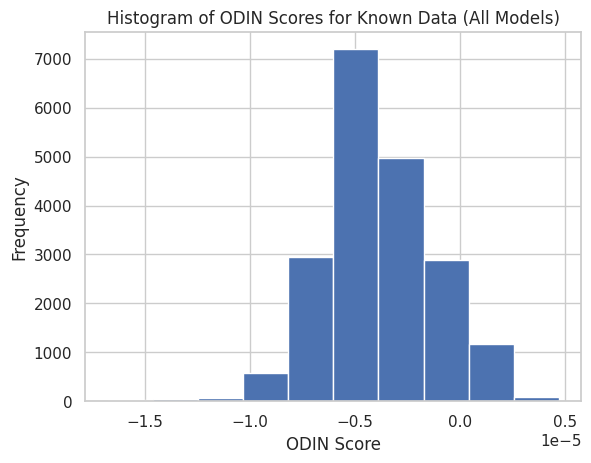

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

batch_size = 32
magnitude = 0.001
temperature = 1000
num_models = 20

loaded_models = [
    res_net01, res_net02, res_net03, res_net04, res_net05,
    res_net06, res_net07, res_net08, res_net09, res_net10,
    res_net11, res_net12, res_net13, res_net14, res_net15,
    res_net16, res_net17, res_net18, res_net19, res_net20
]

odin_scores_all_models = []

for i in range(num_models):
    logits_layer = loaded_models[i].layers[-2].output

    logits_model = tf.keras.Model(inputs=loaded_models[i].input, outputs=logits_layer)

    Known_data_X_test_as_tensor = tf.convert_to_tensor(Known_data_X_test)

    odin_scores_KNOWN = []

    for j in range(0, len(Known_data_X_test), batch_size):
        batch = Known_data_X_test_as_tensor[j:j+batch_size]

        with tf.device("/CPU:0"):
            logits = logits_model(batch)

        with tf.GradientTape() as tape:
            tape.watch(batch)
            logits = logits_model(batch)
        grads = tape.gradient(logits, batch)

        signed_grads = tf.sign(grads)

        perturbed_spectra = batch + magnitude * signed_grads

        with tf.device("/CPU:0"):
            perturbed_logits = logits_model(perturbed_spectra)

        scaled_perturbed_logits = perturbed_logits / temperature

        perturbed_softmax_output = tf.nn.softmax(scaled_perturbed_logits)

        max_perturbed_softmax_scores = tf.reduce_max(perturbed_softmax_output, axis=1)

        original_softmax_output = tf.nn.softmax(logits / temperature)
        max_softmax_scores = tf.reduce_max(original_softmax_output, axis=1)

        odin_scores_batch = max_softmax_scores - max_perturbed_softmax_scores

        odin_scores_KNOWN.extend(odin_scores_batch)

    odin_scores_KNOWN = np.array(odin_scores_KNOWN)
    odin_scores_all_models.append(odin_scores_KNOWN)

combined_odin_scores = np.concatenate(odin_scores_all_models)

plt.hist(combined_odin_scores, bins=10)

plt.xlabel('ODIN Score')
plt.ylabel('Frequency')
plt.title('Histogram of ODIN Scores for Known Data (All Models)')

plt.show()

# Compute OpenMax scores

In [ ]:
import os
folder_path = "/content/gdrive/MyDrive/Stanford_data"
file_name = "KNOWN_all_odin_scores_OBJp1p3.txt"
file_path = os.path.join(folder_path, file_name)
np.savetxt(file_path, combined_odin_scores, delimiter=',')

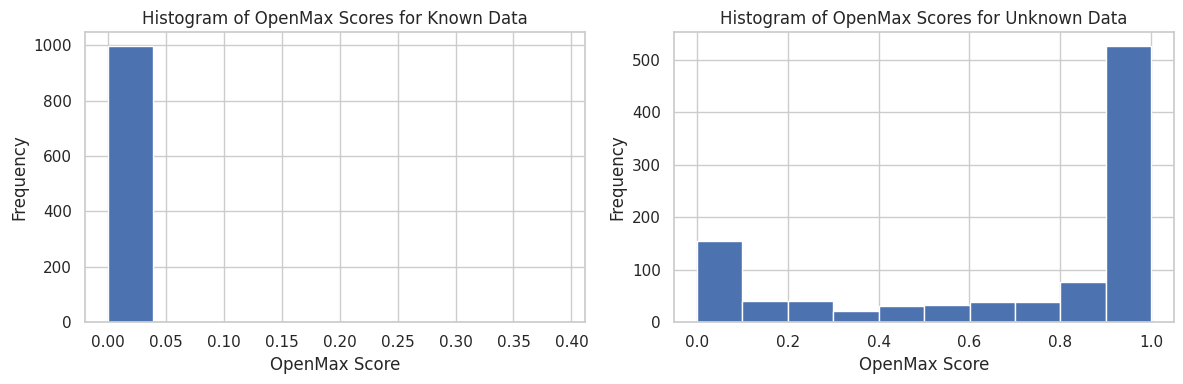

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

logits_layer = res_net01.layers[-2].output

logits_model = tf.keras.Model(inputs=res_net01.input, outputs=logits_layer)

Known_data_X_test_as_tensor = tf.convert_to_tensor(Known_data_X_test)
NeverSeen_data_X_test_as_tensor = tf.convert_to_tensor(NeverSeen_data_X_test)

known_logits = logits_model(Known_data_X_test_as_tensor)
unknown_logits = logits_model(NeverSeen_data_X_test_as_tensor)

max_known_logits = tf.reduce_max(known_logits, axis=1)
max_unknown_logits = tf.reduce_max(unknown_logits, axis=1)

def compute_openmax_scores_known(max_known_logits, alpha=1.0):
    scores_known = tf.exp(alpha * max_known_logits) / tf.reduce_sum(tf.exp(alpha * max_known_logits))
    return scores_known

openmax_scores_known = compute_openmax_scores_known(max_known_logits)

def compute_openmax_scores_unknown(max_known_logits, max_unknown_logits, alpha=1.0):
    scores_unknown = []
    for max_known, max_unknown in zip(max_known_logits, max_unknown_logits):
        unknown_score = tf.exp(alpha * max_known) / (tf.exp(alpha * max_known) + tf.exp(alpha * max_unknown))
        scores_unknown.append(unknown_score)
    return tf.stack(scores_unknown)

openmax_scores_unknown = compute_openmax_scores_unknown(max_known_logits, max_unknown_logits)

openmax_scores_known = openmax_scores_known.numpy()
openmax_scores_unknown = openmax_scores_unknown.numpy()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(openmax_scores_known, bins=10)
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Known Data')

plt.subplot(1, 2, 2)
plt.hist(openmax_scores_unknown, bins=10)
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Unknown Data')

plt.tight_layout()
plt.show()

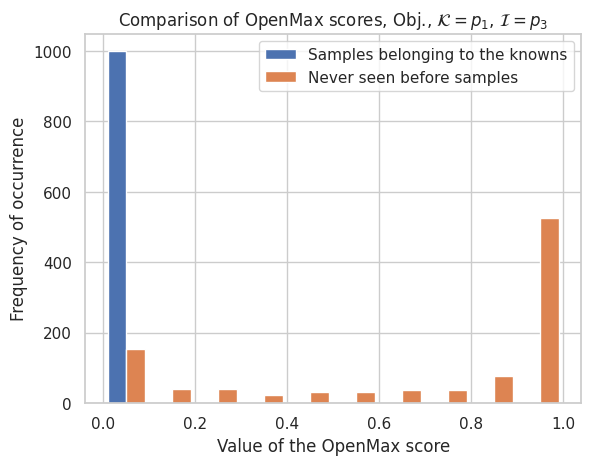

In [ ]:
plt.hist([openmax_scores_known, openmax_scores_unknown], bins=10, label=['Samples belonging to the knowns', 'Never seen before samples'])  # Specify the number of bins and labels

plt.xlabel('Value of the OpenMax score')
plt.ylabel('Frequency of occurrence')
plt.title('Comparison of OpenMax scores, Obj., $\mathcal{K} = p_1$, $\mathcal{I} = p_3$')

plt.legend()

plt.show()

In [ ]:
max(openmax_scores_known)

0.3922371

In [ ]:
min(openmax_scores_unknown)

9.328591e-05

In [ ]:
import numpy as np

openmax_scores_known_sorted = np.sort(openmax_scores_known)
openmax_scores_unknown_sorted = np.sort(openmax_scores_unknown)

min_known_score = openmax_scores_known_sorted.min()
max_known_score = openmax_scores_known_sorted.max()
min_unknown_score = openmax_scores_unknown_sorted.min()
max_unknown_score = openmax_scores_unknown_sorted.max()

bins = np.linspace(min(min_known_score, min_unknown_score), max(max_known_score, max_unknown_score), 1000)

hist_known, _ = np.histogram(openmax_scores_known_sorted, bins)
hist_unknown, _ = np.histogram(openmax_scores_unknown_sorted, bins)

intersection = np.minimum(hist_known, hist_unknown)
union = np.maximum(hist_known, hist_unknown)

iou = np.sum(intersection) / np.sum(union) * 100

print(f"Overlap (IoU): {iou:.2f}%")

Overlap (IoU): 2.56%


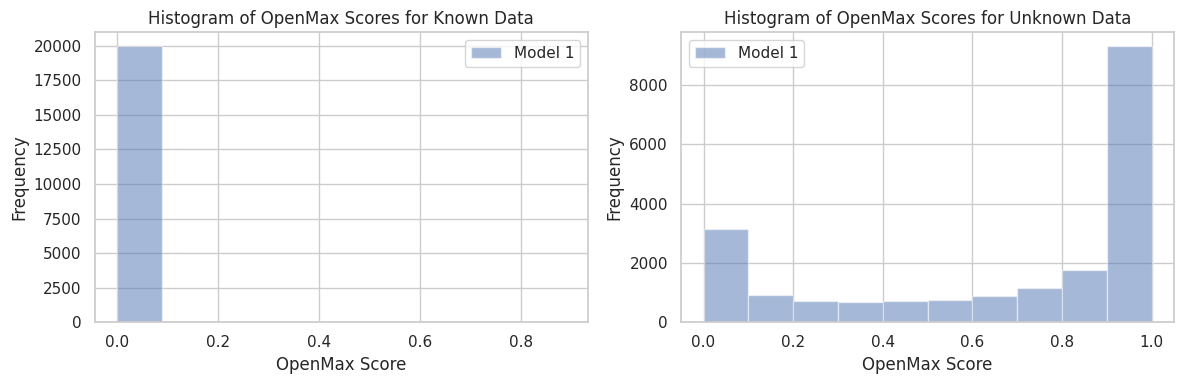

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

alpha = 1.0
num_models = 20

loaded_models = [res_net01, res_net02, res_net03, res_net04, res_net05, res_net06, res_net07, res_net08, res_net09, res_net10,
                 res_net11, res_net12, res_net13, res_net14, res_net15, res_net16, res_net17, res_net18, res_net19, res_net20]

openmax_scores_known = []
openmax_scores_unknown = []

Known_data_X_test_as_tensor = tf.convert_to_tensor(Known_data_X_test)
NeverSeen_data_X_test_as_tensor = tf.convert_to_tensor(NeverSeen_data_X_test)

for model in loaded_models:
    logits_layer = model.layers[-2].output

    logits_model = tf.keras.Model(inputs=model.input, outputs=logits_layer)

    known_logits = logits_model(Known_data_X_test_as_tensor)
    unknown_logits = logits_model(NeverSeen_data_X_test_as_tensor)

    max_known_logits = tf.reduce_max(known_logits, axis=1)
    max_unknown_logits = tf.reduce_max(unknown_logits, axis=1)

    scores_known = tf.exp(alpha * max_known_logits) / tf.reduce_sum(tf.exp(alpha * max_known_logits))

    scores_unknown = []
    for max_known, max_unknown in zip(max_known_logits, max_unknown_logits):
        unknown_score = tf.exp(alpha * max_known) / (tf.exp(alpha * max_known) + tf.exp(alpha * max_unknown))
        scores_unknown.append(unknown_score)

    openmax_scores_known.append(scores_known.numpy())
    openmax_scores_unknown.append(scores_unknown)

merged_openmax_scores_known = np.stack(openmax_scores_known, axis=1)
merged_openmax_scores_unknown = np.stack(openmax_scores_unknown, axis=1)

combined_openmax_scores_known = merged_openmax_scores_known.flatten()
combined_openmax_scores_unknown = merged_openmax_scores_unknown.flatten()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(combined_openmax_scores_known, bins=10, alpha=0.5, label=[f'Model {i+1}' for i in range(num_models)])
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Known Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(combined_openmax_scores_unknown, bins=10, alpha=0.5, label=[f'Model {i+1}' for i in range(num_models)])
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Unknown Data')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
np.savetxt('/content/gdrive/MyDrive/Stanford_data/OBJp1p3_combined_openmax_scores_known.txt', combined_openmax_scores_known)
np.savetxt('/content/gdrive/MyDrive/Stanford_data/OBJp1p3_combined_openmax_scores_unknown.txt', combined_openmax_scores_unknown)


# Computing Mahalanobis scores

In [ ]:
import numpy as np
from scipy.spatial import distance
import tensorflow as tf

def preprocess_data(data):
    preprocessed_data = data
    return preprocessed_data

def extract_deep_features(model, data):
    preprocessed_data = preprocess_data(data)
    deep_features = model.layers[-2].output
    deep_feature_model = tf.keras.Model(inputs=model.input, outputs=deep_features)
    extracted_features = deep_feature_model.predict(preprocessed_data)

    return extracted_features

deep_features_known = extract_deep_features(res_net01, Known_data_X_test)
deep_features_unknown = extract_deep_features(res_net01, NeverSeen_data_X_test)

mean_known = np.mean(deep_features_known, axis=0)
cov_known = np.cov(deep_features_known, rowvar=False)

cond_number = np.linalg.cond(cov_known)
print("Condition Number of Covariance Matrix (Known Data):", cond_number)

epsilon = 1e-6

if cond_number > 1 / epsilon:
    cov_known_reg = cov_known + epsilon * np.eye(cov_known.shape[0])
else:
    cov_known_reg = cov_known

mahalanobis_distances_known = []
for feature in deep_features_known:
    mahalanobis_distance = distance.mahalanobis(feature, mean_known, np.linalg.inv(cov_known_reg))
    mahalanobis_distances_known.append(mahalanobis_distance)

mahalanobis_distances_unknown = []
for feature in deep_features_unknown:
    mahalanobis_distance = distance.mahalanobis(feature, mean_known, np.linalg.inv(cov_known_reg))
    mahalanobis_distances_unknown.append(mahalanobis_distance)

threshold_known = 3.0
threshold_unknown = 4.0

ood_samples_known = [i for i, distance in enumerate(mahalanobis_distances_known) if distance > threshold_known]
ood_samples_unknown = [i for i, distance in enumerate(mahalanobis_distances_unknown) if distance > threshold_unknown]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(mahalanobis_distances_known, bins=10)
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of Mahalanobis Scores for Known Data')

plt.subplot(1, 2, 2)
plt.hist(mahalanobis_distances_unknown, bins=10)
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of Mahalanobis Scores for Unknown Data')

plt.tight_layout()
plt.show()

32/32 [==============================] - 28s 817ms/step
Condition Number of Covariance Matrix (Known Data): 7346.9886485343
Out-of-Distribution Sample Indices (Known Data): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 1

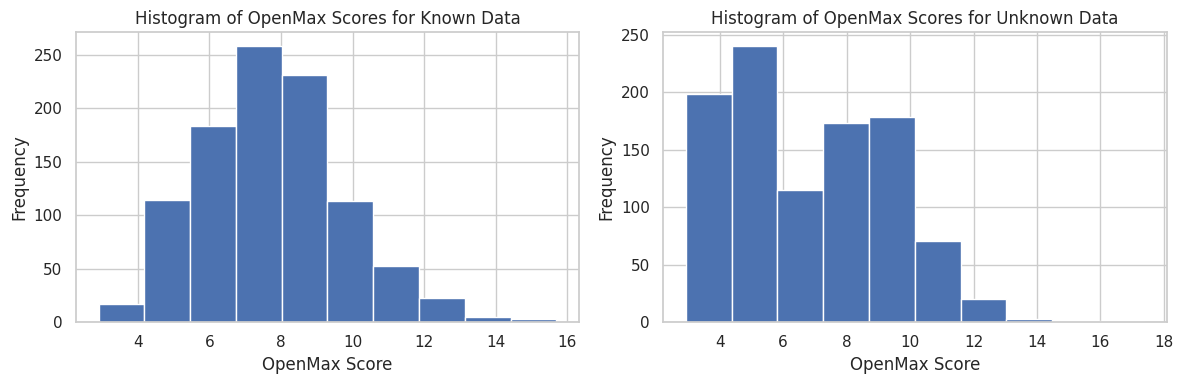

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(mahalanobis_distances_known, bins=10)
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of Mahalanobis Scores for Known Data')

plt.subplot(1, 2, 2)
plt.hist(mahalanobis_distances_unknown, bins=10)
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of Mahalanobis Scores for Unknown Data')

plt.tight_layout()
plt.show()

# Compute Mahalanobis scores

32/32 [==============================] - 7s 196ms/step
Condition Number of Covariance Matrix (Known Data): 4210.354144104828
32/32 [==============================] - 7s 181ms/step
Condition Number of Covariance Matrix (Known Data): 31829.17944313206
32/32 [==============================] - 6s 164ms/step
Condition Number of Covariance Matrix (Known Data): 1793.9365904069957
32/32 [==============================] - 7s 174ms/step
Condition Number of Covariance Matrix (Known Data): 11476.583436883993
32/32 [==============================] - 6s 166ms/step
Condition Number of Covariance Matrix (Known Data): 3757.2931027259515
32/32 [==============================] - 6s 167ms/step
Condition Number of Covariance Matrix (Known Data): 62223.73235528017
32/32 [==============================] - 7s 175ms/step
Condition Number of Covariance Matrix (Known Data): 7763.407203717358
32/32 [==============================] - 7s 177ms/step
Condition Number of Covariance Matrix (Known Data): 3196.9395092899

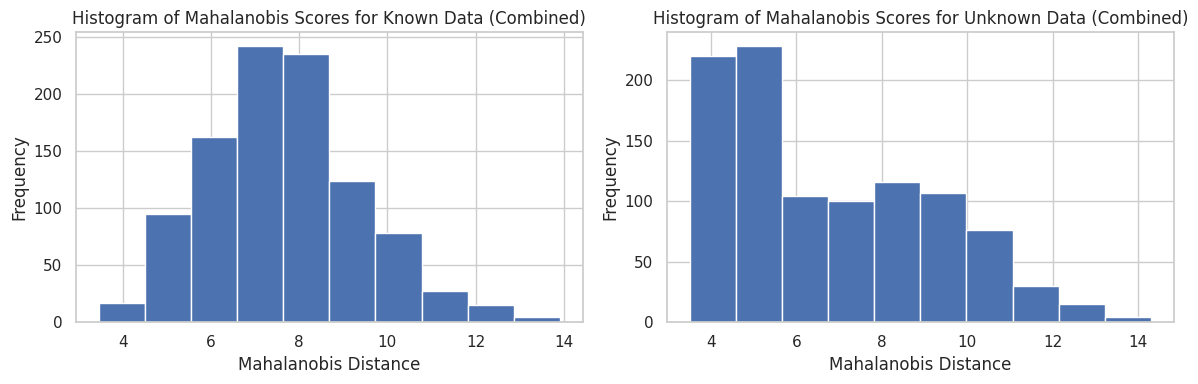

In [ ]:
import numpy as np
from scipy.spatial import distance
import tensorflow as tf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def extract_deep_features(model, data):
    preprocessed_data = preprocess_data(data)
    deep_features = model.layers[-2].output
    deep_feature_model = tf.keras.Model(inputs=model.input, outputs=deep_features)
    extracted_features = deep_feature_model.predict(preprocessed_data)

    return extracted_features

def preprocess_data(data):
    preprocessed_data = data
    return preprocessed_data

loaded_models = [res_net01, res_net02, res_net03, res_net04, res_net05, res_net06, res_net07, res_net08, res_net09, res_net10,
                 res_net11, res_net12, res_net13, res_net14, res_net15, res_net16, res_net17, res_net18, res_net19, res_net20]

deep_features_known_all = []
mahalanobis_distances_known_all = []
deep_features_unknown_all = []
mahalanobis_distances_unknown_all = []

n_components = min(deep_features_known.shape[0], deep_features_known.shape[1]) - 1

for model in loaded_models:
    deep_features_known = extract_deep_features(model, Known_data_X_test)
    deep_features_unknown = extract_deep_features(model, NeverSeen_data_X_test)

    pca = PCA(n_components=n_components)
    deep_features_known_pca = pca.fit_transform(deep_features_known)
    deep_features_unknown_pca = pca.transform(deep_features_unknown)

    mean_known = np.mean(deep_features_known_pca, axis=0)
    cov_known = np.cov(deep_features_known_pca, rowvar=False)

    cond_number = np.linalg.cond(cov_known)
    print("Condition Number of Covariance Matrix (Known Data):", cond_number)

    epsilon = 1e-5

    if cond_number > 1 / epsilon:
        cov_known_reg = cov_known + epsilon * np.eye(cov_known.shape[0])
    else:
        cov_known_reg = cov_known

    mahalanobis_distances_known = []
    for feature in deep_features_known_pca:
        mahalanobis_distance = distance.mahalanobis(feature, mean_known, np.linalg.inv(cov_known_reg))
        mahalanobis_distances_known.append(mahalanobis_distance)

    mahalanobis_distances_unknown = []
    for feature in deep_features_unknown_pca:
        mahalanobis_distance = distance.mahalanobis(feature, mean_known, np.linalg.inv(cov_known_reg))
        mahalanobis_distances_unknown.append(mahalanobis_distance)

    deep_features_known_all.append(deep_features_known_pca)
    mahalanobis_distances_known_all.append(mahalanobis_distances_known)
    deep_features_unknown_all.append(deep_features_unknown_pca)
    mahalanobis_distances_unknown_all.append(mahalanobis_distances_unknown)

deep_features_known_combined = np.concatenate(deep_features_known_all, axis=-1)
mahalanobis_distances_known_combined = np.mean(mahalanobis_distances_known_all, axis=0)

deep_features_unknown_combined = np.concatenate(deep_features_unknown_all, axis=-1)
mahalanobis_distances_unknown_combined = np.mean(mahalanobis_distances_unknown_all, axis=0)

threshold_known = 3.0
threshold_unknown = 4.0

ood_samples_known = [i for i, distance in enumerate(mahalanobis_distances_known_combined) if distance > threshold_known]
ood_samples_unknown = [i for i, distance in enumerate(mahalanobis_distances_unknown_combined) if distance > threshold_unknown]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(mahalanobis_distances_known_combined, bins=10)
plt.xlabel('Mahalanobis Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Mahalanobis Scores for Known Data (Combined)')

plt.subplot(1, 2, 2)
plt.hist(mahalanobis_distances_unknown_combined, bins=10)
plt.xlabel('Mahalanobis Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Mahalanobis Scores for Unknown Data (Combined)')

plt.tight_layout()
plt.show()


In [ ]:
np.savetxt(f'{folder_path}/mahalanobis_distances_known_combined_OBJp1p3.txt', mahalanobis_distances_known_combined)
np.savetxt(f'{folder_path}/mahalanobis_distances_unknown_combined_OBJp1p3.txt', mahalanobis_distances_unknown_combined)


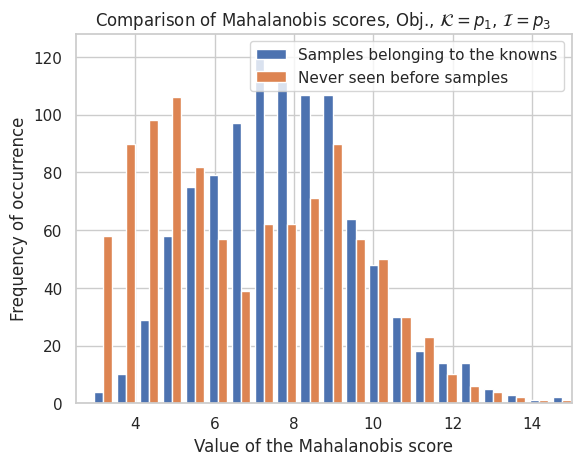

In [ ]:
plt.hist([mahalanobis_distances_known, mahalanobis_distances_unknown], bins=25, label=['Samples belonging to the knowns', 'Never seen before samples'])  # Specify the number of bins and labels
plt.xlim(2.5, 15)

plt.xlabel('Value of the Mahalanobis score')
plt.ylabel('Frequency of occurrence')
plt.title('Comparison of Mahalanobis scores, Obj., $\mathcal{K} = p_1$, $\mathcal{I} = p_3$')

plt.legend()

plt.show()

In [ ]:
import numpy as np

mahalanobis_scores_known_sorted = np.sort(mahalanobis_distances_known)
mahalanobis_scores_unknown_sorted = np.sort(mahalanobis_distances_unknown)

min_known_score = mahalanobis_scores_known_sorted.min()
max_known_score = mahalanobis_scores_known_sorted.max()
min_unknown_score = mahalanobis_scores_unknown_sorted.min()
max_unknown_score = mahalanobis_scores_unknown_sorted.max()

bins = np.linspace(min(min_known_score, min_unknown_score), max(max_known_score, max_unknown_score), 1000)

hist_known, _ = np.histogram(mahalanobis_scores_known_sorted, bins)
hist_unknown, _ = np.histogram(mahalanobis_scores_unknown_sorted, bins)

intersection = np.minimum(hist_known, hist_unknown)
union = np.maximum(hist_known, hist_unknown)

iou = np.sum(intersection) / np.sum(union) * 100

print(f"Overlap (IoU): {iou:.2f}%")

Overlap (IoU): 32.89%


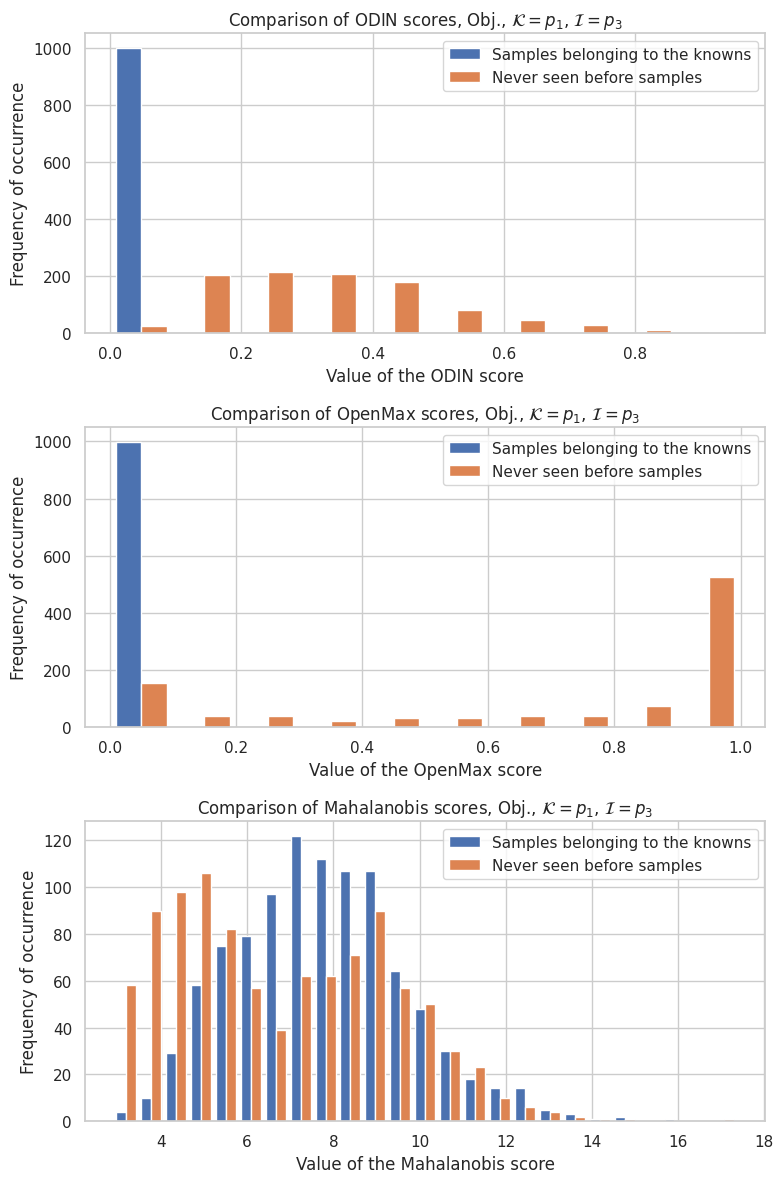

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].hist([odin_scores_KNOWN, odin_scores_UN_KNOWN], bins=10, label=['Samples belonging to the knowns', 'Never seen before samples'])
axs[0].set_xlabel('Value of the ODIN score')
axs[0].set_ylabel('Frequency of occurrence')
axs[0].set_title('Comparison of ODIN scores, Obj., $\mathcal{K} = p_1$, $\mathcal{I} = p_3$')
axs[0].legend()

axs[1].hist([openmax_scores_known, openmax_scores_unknown], bins=10, label=['Samples belonging to the knowns', 'Never seen before samples'])
axs[1].set_xlabel('Value of the OpenMax score')
axs[1].set_ylabel('Frequency of occurrence')
axs[1].set_title('Comparison of OpenMax scores, Obj., $\mathcal{K} = p_1$, $\mathcal{I} = p_3$')
axs[1].legend()

axs[2].hist([mahalanobis_distances_known, mahalanobis_distances_unknown], bins=25, label=['Samples belonging to the knowns', 'Never seen before samples'])
axs[2].set_xlabel('Value of the Mahalanobis score')
axs[2].set_ylabel('Frequency of occurrence')
axs[2].set_title('Comparison of Mahalanobis scores, Obj., $\mathcal{K} = p_1$, $\mathcal{I} = p_3$')
axs[2].legend()

plt.tight_layout()

plt.show()


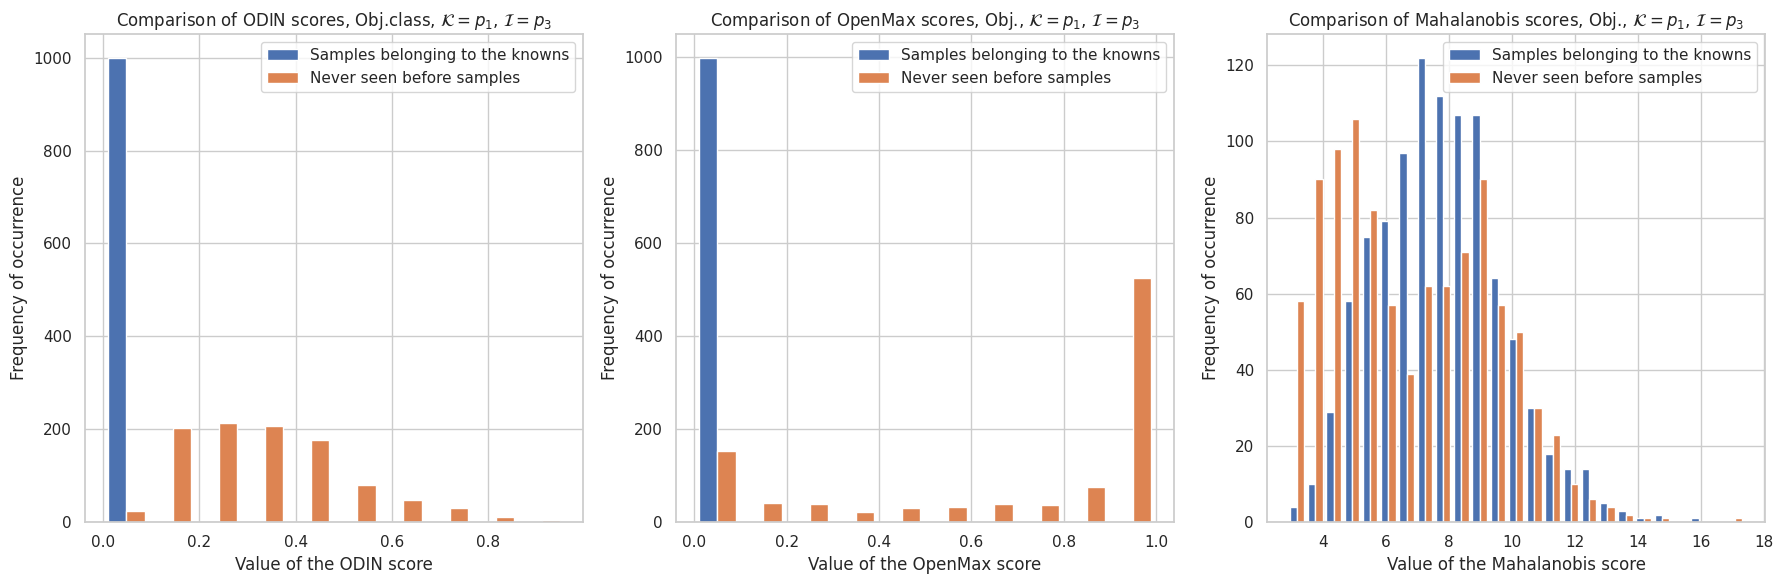

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].hist([odin_scores_KNOWN, odin_scores_UN_KNOWN], bins=10, label=['Samples belonging to the knowns', 'Never seen before samples'])
axs[0].set_xlabel('Value of the ODIN score')
axs[0].set_ylabel('Frequency of occurrence')
axs[0].set_title('Comparison of ODIN scores, Obj.class, $\mathcal{K} = p_1$, $\mathcal{I} = p_3$')
axs[0].legend()

axs[1].hist([openmax_scores_known, openmax_scores_unknown], bins=10, label=['Samples belonging to the knowns', 'Never seen before samples'])
axs[1].set_xlabel('Value of the OpenMax score')
axs[1].set_ylabel('Frequency of occurrence')
axs[1].set_title('Comparison of OpenMax scores, Obj., $\mathcal{K} = p_1$, $\mathcal{I} = p_3$')
axs[1].legend()

axs[2].hist([mahalanobis_distances_known, mahalanobis_distances_unknown], bins=25, label=['Samples belonging to the knowns', 'Never seen before samples'])
axs[2].set_xlabel('Value of the Mahalanobis score')
axs[2].set_ylabel('Frequency of occurrence')
axs[2].set_title('Comparison of Mahalanobis scores, Obj., $\mathcal{K} = p_1$, $\mathcal{I} = p_3$')
axs[2].legend()

plt.tight_layout()

plt.show()


# Separating $\mathcal{K}$ and $\mathcal{N}$ by a fixed (class-independendent) threshold

In [ ]:
prediction_known = prediction_known_ensemble_3
prediction_unknown = prediction_unknown_ensemble_3

In [ ]:
def thresholding(threshold):
  true = 0
  for i in range(prediction_known.shape[0]):
    if prediction_known.argmax(axis=1)[i] == Known_data_X_test_label_int[i] and max(prediction_known[i]) > threshold:
      true += 1
  return true/(prediction_known.shape[0])

In [ ]:
CorrectThresholding = []
for i in range(90):
  CorrectThresholding.append([0.1 + 0.01*i,100*thresholding(0.1 + 0.01*i)])
for i in range(10):
  CorrectThresholding.append([0.99 + 0.001*i,100*thresholding(0.99 + 0.001*i)])
CorrectThresholding

[[0.1, 89.0],
 [0.11, 88.9],
 [0.12000000000000001, 88.9],
 [0.13, 88.9],
 [0.14, 88.9],
 [0.15000000000000002, 88.8],
 [0.16, 88.7],
 [0.17, 88.6],
 [0.18, 88.5],
 [0.19, 88.4],
 [0.2, 88.3],
 [0.21000000000000002, 88.1],
 [0.22, 88.0],
 [0.23, 87.8],
 [0.24000000000000002, 87.7],
 [0.25, 87.6],
 [0.26, 87.6],
 [0.27, 87.6],
 [0.28, 87.5],
 [0.29000000000000004, 87.3],
 [0.30000000000000004, 87.3],
 [0.31, 87.3],
 [0.32, 87.2],
 [0.33, 87.1],
 [0.33999999999999997, 87.1],
 [0.35, 87.1],
 [0.36, 86.7],
 [0.37, 86.5],
 [0.38, 86.2],
 [0.39, 86.2],
 [0.4, 86.1],
 [0.41000000000000003, 85.9],
 [0.42000000000000004, 85.8],
 [0.43000000000000005, 85.6],
 [0.44000000000000006, 85.39999999999999],
 [0.45000000000000007, 85.3],
 [0.45999999999999996, 85.1],
 [0.47, 85.0],
 [0.48, 84.7],
 [0.49, 84.7],
 [0.5, 84.5],
 [0.51, 84.39999999999999],
 [0.52, 84.0],
 [0.53, 83.89999999999999],
 [0.54, 83.6],
 [0.55, 83.5],
 [0.56, 83.5],
 [0.5700000000000001, 83.39999999999999],
 [0.58, 83.2],
 [0.59, 

In [ ]:
def false_identify(threshold):
  false_identify = 0
  for i in range(prediction_known.shape[0]):
    if prediction_known.argmax(axis=1)[i] != Known_data_X_test_label_int[i] and max(prediction_known[i]) > threshold:
      false_identify += 1
  return false_identify/(prediction_known.shape[0])

In [ ]:
FalseIdentify = []
for i in range(90):
  FalseIdentify.append([0.1 + 0.01*i,100*false_identify(0.1 + 0.01*i)])
for i in range(10):
  FalseIdentify.append([0.99 + 0.001*i,100*false_identify(0.99 + 0.001*i)])
FalseIdentify

[[0.1, 11.0],
 [0.11, 10.6],
 [0.12000000000000001, 10.5],
 [0.13, 10.4],
 [0.14, 10.4],
 [0.15000000000000002, 10.4],
 [0.16, 10.4],
 [0.17, 10.299999999999999],
 [0.18, 10.299999999999999],
 [0.19, 10.2],
 [0.2, 10.100000000000001],
 [0.21000000000000002, 9.9],
 [0.22, 9.9],
 [0.23, 9.9],
 [0.24000000000000002, 9.8],
 [0.25, 9.8],
 [0.26, 9.8],
 [0.27, 9.8],
 [0.28, 9.700000000000001],
 [0.29000000000000004, 9.700000000000001],
 [0.30000000000000004, 9.700000000000001],
 [0.31, 9.700000000000001],
 [0.32, 9.6],
 [0.33, 9.6],
 [0.33999999999999997, 9.6],
 [0.35, 9.6],
 [0.36, 9.5],
 [0.37, 9.3],
 [0.38, 9.3],
 [0.39, 9.0],
 [0.4, 8.799999999999999],
 [0.41000000000000003, 8.6],
 [0.42000000000000004, 8.4],
 [0.43000000000000005, 8.4],
 [0.44000000000000006, 8.3],
 [0.45000000000000007, 8.200000000000001],
 [0.45999999999999996, 8.0],
 [0.47, 7.8],
 [0.48, 7.8],
 [0.49, 7.8],
 [0.5, 7.5],
 [0.51, 7.5],
 [0.52, 7.3999999999999995],
 [0.53, 7.3],
 [0.54, 7.199999999999999],
 [0.55, 6.9],

In [ ]:
def misclassifyunknown(threshold):
  misclassifyunknown = 0
  for i in range(prediction_unknown.shape[0]):
    if max(prediction_unknown[i]) > threshold:
      misclassifyunknown += 1
  return misclassifyunknown/(prediction_unknown.shape[0])

In [ ]:
UnknownMisclassify = []
for i in range(90):
  UnknownMisclassify.append([0.1 + 0.01*i,100*misclassifyunknown(0.1 + 0.01*i)])
for i in range(10):
  UnknownMisclassify.append([0.99 + 0.001*i,100*misclassifyunknown(0.99 + 0.001*i)])
UnknownMisclassify

[[0.1, 100.0],
 [0.11, 84.6],
 [0.12000000000000001, 75.7],
 [0.13, 71.89999999999999],
 [0.14, 70.1],
 [0.15000000000000002, 69.0],
 [0.16, 68.2],
 [0.17, 67.5],
 [0.18, 66.4],
 [0.19, 65.7],
 [0.2, 64.3],
 [0.21000000000000002, 63.9],
 [0.22, 63.1],
 [0.23, 62.3],
 [0.24000000000000002, 61.9],
 [0.25, 60.8],
 [0.26, 60.4],
 [0.27, 59.699999999999996],
 [0.28, 59.0],
 [0.29000000000000004, 58.199999999999996],
 [0.30000000000000004, 57.49999999999999],
 [0.31, 57.099999999999994],
 [0.32, 56.3],
 [0.33, 56.10000000000001],
 [0.33999999999999997, 55.7],
 [0.35, 55.00000000000001],
 [0.36, 54.800000000000004],
 [0.37, 54.1],
 [0.38, 53.800000000000004],
 [0.39, 53.1],
 [0.4, 52.900000000000006],
 [0.41000000000000003, 52.5],
 [0.42000000000000004, 52.0],
 [0.43000000000000005, 51.6],
 [0.44000000000000006, 51.2],
 [0.45000000000000007, 50.9],
 [0.45999999999999996, 50.4],
 [0.47, 50.0],
 [0.48, 49.7],
 [0.49, 49.3],
 [0.5, 48.5],
 [0.51, 48.3],
 [0.52, 47.9],
 [0.53, 47.5],
 [0.54, 47.0

In [ ]:
def dontknow(threshold):
  notknown = 0
  for i in range(prediction_known.shape[0]):
    if max(prediction_known[i]) <= threshold:
      notknown += 1
  return notknown/(prediction_known.shape[0])

In [ ]:
DontKnowThresholding = []
for i in range(90):
  DontKnowThresholding.append([0.1 + 0.01*i,100*dontknow(0.1 + 0.01*i)])
for i in range(10):
  DontKnowThresholding.append([0.99 + 0.001*i,100*dontknow(0.99 + 0.001*i)])
DontKnowThresholding

[[0.1, 0.0],
 [0.11, 0.5],
 [0.12000000000000001, 0.6],
 [0.13, 0.7000000000000001],
 [0.14, 0.7000000000000001],
 [0.15000000000000002, 0.8],
 [0.16, 0.8999999999999999],
 [0.17, 1.0999999999999999],
 [0.18, 1.2],
 [0.19, 1.4000000000000001],
 [0.2, 1.6],
 [0.21000000000000002, 2.0],
 [0.22, 2.1],
 [0.23, 2.3],
 [0.24000000000000002, 2.5],
 [0.25, 2.6],
 [0.26, 2.6],
 [0.27, 2.6],
 [0.28, 2.8000000000000003],
 [0.29000000000000004, 3.0],
 [0.30000000000000004, 3.0],
 [0.31, 3.0],
 [0.32, 3.2],
 [0.33, 3.3000000000000003],
 [0.33999999999999997, 3.3000000000000003],
 [0.35, 3.3000000000000003],
 [0.36, 3.8],
 [0.37, 4.2],
 [0.38, 4.5],
 [0.39, 4.8],
 [0.4, 5.1],
 [0.41000000000000003, 5.5],
 [0.42000000000000004, 5.800000000000001],
 [0.43000000000000005, 6.0],
 [0.44000000000000006, 6.3],
 [0.45000000000000007, 6.5],
 [0.45999999999999996, 6.9],
 [0.47, 7.199999999999999],
 [0.48, 7.5],
 [0.49, 7.5],
 [0.5, 8.0],
 [0.51, 8.1],
 [0.52, 8.6],
 [0.53, 8.799999999999999],
 [0.54, 9.2],
 [

In [ ]:
aligned_array = [element for row in prediction_unknown for element in row]
max_value = max(aligned_array)
print("The maximum value in the aligned array is:", max_value)


The maximum value in the aligned array is: 0.9999789


In [ ]:
thresholding(max_value)

0.14

In [ ]:
dontknow(max_value)

0.86

In [ ]:
misclassifyunknown(max_value)

0.0

In [ ]:
false_identify(max_value)

0.0

In [ ]:
DontKnowThresholdingANOTHER = []

for i in range(89):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.1 + 0.01*i),100*dontknow(0.1 + 0.01*i),])

for i in range(10):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.99 + 0.001*i),100*dontknow(0.99 + 0.001*i),])

for i in range(10):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.999 + 0.0001*i),100*dontknow(0.999 + 0.0001*i),])

for i in range(10):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.9999 + 0.00001*i),100*dontknow(0.9999 + 0.00001*i),])

for i in range(9):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.99999 + 0.000001*i),100*dontknow(0.99999 + 0.000001*i),])

DontKnowThresholdingANOTHER.append([100*thresholding(max_value),100*dontknow(max_value)])

DontKnowThresholdingANOTHER

[[89.0, 0.0],
 [88.9, 0.5],
 [88.9, 0.6],
 [88.9, 0.7000000000000001],
 [88.9, 0.7000000000000001],
 [88.8, 0.8],
 [88.7, 0.8999999999999999],
 [88.6, 1.0999999999999999],
 [88.5, 1.2],
 [88.4, 1.4000000000000001],
 [88.3, 1.6],
 [88.1, 2.0],
 [88.0, 2.1],
 [87.8, 2.3],
 [87.7, 2.5],
 [87.6, 2.6],
 [87.6, 2.6],
 [87.6, 2.6],
 [87.5, 2.8000000000000003],
 [87.3, 3.0],
 [87.3, 3.0],
 [87.3, 3.0],
 [87.2, 3.2],
 [87.1, 3.3000000000000003],
 [87.1, 3.3000000000000003],
 [87.1, 3.3000000000000003],
 [86.7, 3.8],
 [86.5, 4.2],
 [86.2, 4.5],
 [86.2, 4.8],
 [86.1, 5.1],
 [85.9, 5.5],
 [85.8, 5.800000000000001],
 [85.6, 6.0],
 [85.39999999999999, 6.3],
 [85.3, 6.5],
 [85.1, 6.9],
 [85.0, 7.199999999999999],
 [84.7, 7.5],
 [84.7, 7.5],
 [84.5, 8.0],
 [84.39999999999999, 8.1],
 [84.0, 8.6],
 [83.89999999999999, 8.799999999999999],
 [83.6, 9.2],
 [83.5, 9.6],
 [83.5, 9.700000000000001],
 [83.39999999999999, 9.9],
 [83.2, 10.299999999999999],
 [82.8, 10.9],
 [82.6, 11.200000000000001],
 [82.3999999

In [ ]:
UnknownMisclassifyANOTHER = []
for i in range(89):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.1 + 0.01*i),100*misclassifyunknown(0.1 + 0.01*i),])
for i in range(10):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.99 + 0.001*i),100*misclassifyunknown(0.99 + 0.001*i),])

for i in range(10):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.999 + 0.0001*i),100*misclassifyunknown(0.999 + 0.0001*i),])

for i in range(10):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.9999 + 0.00001*i),100*misclassifyunknown(0.9999 + 0.00001*i),])

for i in range(9):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.99999 + 0.000001*i),100*misclassifyunknown(0.99999 + 0.000001*i),])

UnknownMisclassifyANOTHER.append([100*thresholding(max_value),100*misclassifyunknown(max_value),])

UnknownMisclassifyANOTHER

[[89.0, 100.0],
 [88.9, 84.6],
 [88.9, 75.7],
 [88.9, 71.89999999999999],
 [88.9, 70.1],
 [88.8, 69.0],
 [88.7, 68.2],
 [88.6, 67.5],
 [88.5, 66.4],
 [88.4, 65.7],
 [88.3, 64.3],
 [88.1, 63.9],
 [88.0, 63.1],
 [87.8, 62.3],
 [87.7, 61.9],
 [87.6, 60.8],
 [87.6, 60.4],
 [87.6, 59.699999999999996],
 [87.5, 59.0],
 [87.3, 58.199999999999996],
 [87.3, 57.49999999999999],
 [87.3, 57.099999999999994],
 [87.2, 56.3],
 [87.1, 56.10000000000001],
 [87.1, 55.7],
 [87.1, 55.00000000000001],
 [86.7, 54.800000000000004],
 [86.5, 54.1],
 [86.2, 53.800000000000004],
 [86.2, 53.1],
 [86.1, 52.900000000000006],
 [85.9, 52.5],
 [85.8, 52.0],
 [85.6, 51.6],
 [85.39999999999999, 51.2],
 [85.3, 50.9],
 [85.1, 50.4],
 [85.0, 50.0],
 [84.7, 49.7],
 [84.7, 49.3],
 [84.5, 48.5],
 [84.39999999999999, 48.3],
 [84.0, 47.9],
 [83.89999999999999, 47.5],
 [83.6, 47.0],
 [83.5, 46.400000000000006],
 [83.5, 45.800000000000004],
 [83.39999999999999, 44.6],
 [83.2, 44.2],
 [82.8, 43.5],
 [82.6, 42.6],
 [82.3999999999999

In [ ]:
FalseIdentifyANOTHER = []
for i in range(89):
  FalseIdentifyANOTHER.append([100*thresholding(0.1 + 0.01*i),100*false_identify(0.1 + 0.01*i),])
for i in range(10):
  FalseIdentifyANOTHER.append([100*thresholding(0.99 + 0.001*i),100*false_identify(0.99 + 0.001*i)])

for i in range(10):
  FalseIdentifyANOTHER.append([100*thresholding(0.999 + 0.0001*i),100*false_identify(0.999 + 0.0001*i),])

for i in range(10):
  FalseIdentifyANOTHER.append([100*thresholding(0.9999 + 0.00001*i),100*false_identify(0.9999 + 0.00001*i),])

for i in range(9):
  FalseIdentifyANOTHER.append([100*thresholding(0.99999 + 0.000001*i),100*false_identify(0.99999 + 0.000001*i),])

FalseIdentifyANOTHER.append([100*thresholding(max_value),100*false_identify(max_value),])
FalseIdentifyANOTHER

[[89.0, 11.0],
 [88.9, 10.6],
 [88.9, 10.5],
 [88.9, 10.4],
 [88.9, 10.4],
 [88.8, 10.4],
 [88.7, 10.4],
 [88.6, 10.299999999999999],
 [88.5, 10.299999999999999],
 [88.4, 10.2],
 [88.3, 10.100000000000001],
 [88.1, 9.9],
 [88.0, 9.9],
 [87.8, 9.9],
 [87.7, 9.8],
 [87.6, 9.8],
 [87.6, 9.8],
 [87.6, 9.8],
 [87.5, 9.700000000000001],
 [87.3, 9.700000000000001],
 [87.3, 9.700000000000001],
 [87.3, 9.700000000000001],
 [87.2, 9.6],
 [87.1, 9.6],
 [87.1, 9.6],
 [87.1, 9.6],
 [86.7, 9.5],
 [86.5, 9.3],
 [86.2, 9.3],
 [86.2, 9.0],
 [86.1, 8.799999999999999],
 [85.9, 8.6],
 [85.8, 8.4],
 [85.6, 8.4],
 [85.39999999999999, 8.3],
 [85.3, 8.200000000000001],
 [85.1, 8.0],
 [85.0, 7.8],
 [84.7, 7.8],
 [84.7, 7.8],
 [84.5, 7.5],
 [84.39999999999999, 7.5],
 [84.0, 7.3999999999999995],
 [83.89999999999999, 7.3],
 [83.6, 7.199999999999999],
 [83.5, 6.9],
 [83.5, 6.800000000000001],
 [83.39999999999999, 6.7],
 [83.2, 6.5],
 [82.8, 6.3],
 [82.6, 6.2],
 [82.39999999999999, 5.7],
 [82.3, 5.5],
 [82.1, 5.4],

In [ ]:
prediction_known = prediction_known_ensemble_1
prediction_unknown = prediction_unknown_ensemble_1

In [ ]:
aligned_array = [element for row in prediction_unknown for element in row]
max_value = max(aligned_array)

print("The maximum value in the aligned array is:", max_value)


The maximum value in the aligned array is: 0.9999878


In [ ]:
thresholding(max_value)

0.122

In [ ]:
dontknow(max_value)

0.878

In [ ]:
misclassifyunknown(max_value)

0.0

In [ ]:
false_identify(max_value)

0.0

# Class-adaptive threshold

# Run #1

In [ ]:
prediction_known = prediction_known_ensemble_1
prediction_unknown = prediction_unknown_ensemble_1

In [ ]:
ThresholdNeverSeenBefores = []
for i in range(10):
  ThresholdNeverSeenBefores.append(np.max(prediction_unknown[:,i]))

In [ ]:
C_count0 = 0
for i in range(100):
  if prediction_known[i,0] > ThresholdNeverSeenBefores[0] and np.argmax(prediction_known[i]) == 0:
    C_count0 += 1
  else:
    C_count0 += 0
C_count0

20

In [ ]:
mistake0 = 0
for i in range(100):
  if np.argmax(prediction_known[i]) != 0 and max(prediction_known[i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[i])]:
    mistake0 += 1
    print(i)
  else:
    mistake0 += 0
mistake0
print("Number of mistakes in this class:",mistake0)

54
Number of mistakes in this class: 1


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[54])] = max(prediction_known[54])

In [ ]:
C_count1 = 0
for i in range(100):
  if prediction_known[100 + i,1] > ThresholdNeverSeenBefores[1] and np.argmax(prediction_known[100 + i]) == 1:
    C_count1 += 1
  else:
    C_count1 += 0
C_count1

66

In [ ]:
mistake1 = 0
for i in range(100):
  if np.argmax(prediction_known[100 + i]) != 1 and max(prediction_known[100 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[100 + i])]:
    mistake1 += 1
    print(100 + i)
  else:
    mistake1 += 0
mistake1
print("Number of mistakes in this class:",mistake1)

Number of mistakes in this class: 0


In [ ]:
C_count2 = 0
for i in range(100):
  if prediction_known[200 + i,2] > ThresholdNeverSeenBefores[2] and np.argmax(prediction_known[200 + i]) == 2:
    C_count2 += 1
  else:
    C_count2 += 0
C_count2

4

In [ ]:
mistake2 = 0
for i in range(100):
  if np.argmax(prediction_known[200 + i]) != 2 and max(prediction_known[200 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[200 + i])]:
    mistake2 += 1
    print(200 + i)
  else:
    mistake2 += 0
mistake2
print("Number of mistakes in this class:",mistake2)

244
296
Number of mistakes in this class: 2


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[244])] = max(prediction_known[244])

In [ ]:
mistake2 = 0
for i in range(100):
  if np.argmax(prediction_known[200 + i]) != 2 and max(prediction_known[200 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[200 + i])]:
    mistake2 += 1
    print(200 + i)
  else:
    mistake2 += 0
mistake2
print("Number of mistakes in this class:",mistake2)

Number of mistakes in this class: 0


In [ ]:
C_count3 = 0
for i in range(100):
  if prediction_known[300 + i,3] > ThresholdNeverSeenBefores[3] and np.argmax(prediction_known[300 + i]) == 3:
    C_count3 += 1
  else:
    C_count3 += 0
C_count3

97

In [ ]:
mistake3 = 0
for i in range(100):
  if np.argmax(prediction_known[300 + i]) != 3 and max(prediction_known[300 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[300 + i])]:
    mistake3 += 1
    print(300 + i)
  else:
    mistake3 += 0
mistake3
print("Number of mistakes in this class:",mistake3)

Number of mistakes in this class: 0


In [ ]:
C_count4 = 0
for i in range(100):
  if prediction_known[400 + i,4] > ThresholdNeverSeenBefores[4] and np.argmax(prediction_known[400 + i]) == 4:
    C_count4 += 1
  else:
    C_count4 += 0
C_count4

83

In [ ]:
mistake4 = 0
for i in range(100):
  if np.argmax(prediction_known[400 + i]) != 4 and max(prediction_known[400 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[400 + i])]:
    mistake4 += 1
    print(400 + i)
  else:
    mistake4 += 0
print("Number of mistakes in this class:",mistake4)

495
Number of mistakes in this class: 1


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[495])] = max(prediction_known[495])

In [ ]:
mistake4 = 0
for i in range(100):
  if np.argmax(prediction_known[400 + i]) != 4 and max(prediction_known[400 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[400 + i])]:
    mistake4 += 1
    print(400 + i)
  else:
    mistake4 += 0
print("Number of mistakes in this class:",mistake4)

Number of mistakes in this class: 0


In [ ]:
C_count5 = 0
for i in range(100):
  if prediction_known[500 + i,5] > ThresholdNeverSeenBefores[5] and np.argmax(prediction_known[500 + i]) == 5:
    C_count5 += 1
  else:
    C_count5 += 0
C_count5

99

In [ ]:
mistake5 = 0
for i in range(100):
  if np.argmax(prediction_known[500 + i]) != 5 and max(prediction_known[500 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[500 + i])]:
    mistake5 += 1
    print(500 + i)
  else:
    mistake5 += 0
print("Number of mistakes in this class:",mistake5)

592
Number of mistakes in this class: 1


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[592])] = max(prediction_known[592])

In [ ]:
mistake5 = 0
for i in range(100):
  if np.argmax(prediction_known[500 + i]) != 5 and ThresholdNeverSeenBefores[5] > ThresholdNeverSeenBefores[np.argmax(prediction_known[500 + i])]:
    mistake5 += 1
    print(500 + i)
  else:
    mistake5 += 0
print("Number of mistakes in this class:",mistake5)

Number of mistakes in this class: 0


In [ ]:
C_count6 = 0
for i in range(100):
  if prediction_known[600 + i,6] > ThresholdNeverSeenBefores[6] and np.argmax(prediction_known[600 + i]) == 6:
    C_count6 += 1
  else:
    C_count6 += 0
C_count6

5

In [ ]:
mistake6 = 0
for i in range(100):
  if np.argmax(prediction_known[600 + i]) != 6 and max(prediction_known[600 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[600 + i])]:
    mistake6 += 1
    print(600 + i)
  else:
    mistake6 += 0
print("Number of mistakes in this class:",mistake6)

Number of mistakes in this class: 0


In [ ]:
C_count7 = 0
for i in range(100):
  if prediction_known[700 + i,7] > ThresholdNeverSeenBefores[7]  and np.argmax(prediction_known[700 + i]) == 7:
    C_count7 += 1
  else:
    C_count7 += 0
C_count7

63

In [ ]:
mistake7 = 0
for i in range(100):
  if np.argmax(prediction_known[700 + i]) != 7 and max(prediction_known[700 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[700 + i])]:
    mistake7 += 1
    print(700 + i)
  else:
    mistake7 += 0
print("Number of mistakes in this class:",mistake7)

718
Number of mistakes in this class: 1


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[718])] = max(prediction_known[718])

In [ ]:
mistake7 = 0
for i in range(100):
  if np.argmax(prediction_known[700 + i]) != 7 and max(prediction_known[700 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[700 + i])]:
    mistake7 += 1
    print(700 + i)
  else:
    mistake7 += 0
print("Number of mistakes in this class:",mistake7)

Number of mistakes in this class: 0


In [ ]:
C_count8 = 0
for i in range(100):
  if prediction_known[800 + i,8] > ThresholdNeverSeenBefores[8] and np.argmax(prediction_known[800 + i]) == 8:
    C_count8 += 1
  else:
    C_count8 += 0
C_count8

25

In [ ]:
mistake8 = 0
for i in range(100):
  if np.argmax(prediction_known[800 + i]) != 8 and max(prediction_known[800 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[800 + i])]:
    mistake8 += 1
    print(800 + i)
  else:
    mistake8 += 0
print("Number of mistakes in this class:",mistake8)

860
888
Number of mistakes in this class: 2


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[860])] = max(prediction_known[860])

In [ ]:
mistake8 = 0
for i in range(100):
  if np.argmax(prediction_known[800 + i]) != 8 and max(prediction_known[800 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[800 + i])]:
    mistake8 += 1
    print(800 + i)
  else:
    mistake8 += 0
print("Number of mistakes in this class:",mistake8)

Number of mistakes in this class: 0


In [ ]:
C_count9 = 0
for i in range(100):
  if prediction_known[900 + i,9] > ThresholdNeverSeenBefores[9] and np.argmax(prediction_known[900 + i]) == 9:
    C_count9 += 1
  else:
    C_count9 += 0
C_count9

94

In [ ]:
mistake9 = 0
for i in range(100):
  if np.argmax(prediction_known[900 + i]) != 9 and max(prediction_known[900 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[900 + i])]:
    mistake9 += 1
    print(900 + i)
  else:
    mistake9 += 0
print("Number of mistakes in this class:",mistake9)

Number of mistakes in this class: 0


In [ ]:
C_count0 = 0
for i in range(100):
  if prediction_known[i,0] > ThresholdNeverSeenBefores[0] and np.argmax(prediction_known[i]) == 0:
    C_count0 += 1
  else:
    C_count0 += 0

C_count1 = 0
for i in range(100):
  if prediction_known[100 + i,1] > ThresholdNeverSeenBefores[1] and np.argmax(prediction_known[100 + i]) == 1:
    C_count1 += 1
  else:
    C_count1 += 0

C_count2 = 0
for i in range(100):
  if prediction_known[200 + i,2] > ThresholdNeverSeenBefores[2] and np.argmax(prediction_known[200 + i]) == 2:
    C_count2 += 1
  else:
    C_count2 += 0

C_count3 = 0
for i in range(100):
  if prediction_known[300 + i,3] > ThresholdNeverSeenBefores[3] and np.argmax(prediction_known[300 + i]) == 3:
    C_count3 += 1
  else:
    C_count3 += 0

C_count4 = 0
for i in range(100):
  if prediction_known[400 + i,4] > ThresholdNeverSeenBefores[4] and np.argmax(prediction_known[400 + i]) == 4:
    C_count4 += 1
  else:
    C_count4 += 0

C_count5 = 0
for i in range(100):
  if prediction_known[500 + i,5] > ThresholdNeverSeenBefores[5] and np.argmax(prediction_known[500 + i]) == 5:
    C_count5 += 1
  else:
    C_count5 += 0

C_count6 = 0
for i in range(100):
  if prediction_known[600 + i,6] > ThresholdNeverSeenBefores[6] and np.argmax(prediction_known[600 + i]) == 6:
    C_count6 += 1
  else:
    C_count6 += 0

C_count7 = 0
for i in range(100):
  if prediction_known[700 + i,7] > ThresholdNeverSeenBefores[7]  and np.argmax(prediction_known[700 + i]) == 7:
    C_count7 += 1
  else:
    C_count7 += 0

C_count8 = 0
for i in range(100):
  if prediction_known[800 + i,8] > ThresholdNeverSeenBefores[8] and np.argmax(prediction_known[800 + i]) == 8:
    C_count8 += 1
  else:
    C_count8 += 0

C_count9 = 0
for i in range(100):
  if prediction_known[900 + i,9] > ThresholdNeverSeenBefores[9] and np.argmax(prediction_known[900 + i]) == 9:
    C_count9 += 1
  else:
    C_count9 += 0



In [ ]:
FinalDistributionOver10ClassesRun1 = [[1,C_count0],[2,C_count1],[3,C_count2],[4,C_count3],[5,C_count4],[6,C_count5],[7,C_count6],[8,C_count7],[9,C_count8],[10,C_count9]]
FinalDistributionOver10ClassesRun1

[[1, 20],
 [2, 66],
 [3, 4],
 [4, 77],
 [5, 63],
 [6, 99],
 [7, 5],
 [8, 53],
 [9, 25],
 [10, 94]]

In [ ]:
mistake0 = 0
for i in range(100):
  if np.argmax(prediction_known[i]) != 0 and max(prediction_known[i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[i])]:
    mistake0 += 1
    print(i)
  else:
    mistake0 += 0

mistake1 = 0
for i in range(100):
  if np.argmax(prediction_known[100 + i]) != 1 and max(prediction_known[100 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[100 + i])]:
    mistake1 += 1
    print(100 + i)
  else:
    mistake1 += 0

mistake2 = 0
for i in range(100):
  if np.argmax(prediction_known[200 + i]) != 2 and max(prediction_known[200 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[200 + i])]:
    mistake2 += 1
    print(200 + i)
  else:
    mistake2 += 0

mistake3 = 0
for i in range(100):
  if np.argmax(prediction_known[300 + i]) != 3 and max(prediction_known[300 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[300 + i])]:
    mistake3 += 1
    print(300 + i)
  else:
    mistake3 += 0

mistake4 = 0
for i in range(100):
  if np.argmax(prediction_known[400 + i]) != 4 and max(prediction_known[400 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[400 + i])]:
    mistake4 += 1
    print(400 + i)
  else:
    mistake4 += 0

mistake5 = 0
for i in range(100):
  if np.argmax(prediction_known[500 + i]) != 5 and max(prediction_known[500 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[500 + i])]:
    mistake5 += 1
    print(500 + i)
  else:
    mistake5 += 0

mistake6 = 0
for i in range(100):
  if np.argmax(prediction_known[600 + i]) != 6 and max(prediction_known[600 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[600 + i])]:
    mistake6 += 1
    print(600 + i)
  else:
    mistake6 += 0

mistake7 = 0
for i in range(100):
  if np.argmax(prediction_known[700 + i]) != 7 and max(prediction_known[700 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[700 + i])]:
    mistake7 += 1
    print(700 + i)
  else:
    mistake7 += 0

mistake8 = 0
for i in range(100):
  if np.argmax(prediction_known[800 + i]) != 8 and max(prediction_known[800 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[800 + i])]:
    mistake8 += 1
    print(800 + i)
  else:
    mistake8 += 0

mistake9 = 0
for i in range(100):
  if np.argmax(prediction_known[900 + i]) != 9 and max(prediction_known[900 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[900 + i])]:
    mistake9 += 1
    print(900 + i)
  else:
    mistake9 += 0

NumberOfMistakesAfterThrAdj = [mistake0, mistake1, mistake2, mistake3, mistake4, mistake5, mistake6, mistake7, mistake8, mistake9]
NumberOfMistakesAfterThrAdj

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Average over 10 classes

In [ ]:
(C_count0 + C_count1 + C_count2 + C_count3 + C_count4 + C_count5 + C_count6 + C_count7 + C_count8 + C_count9)/1000

0.506

# Average dataset

In [ ]:
import numpy as np

all_datasets = [FinalDistributionOver10ClassesRun1, FinalDistributionOver10ClassesRun2, FinalDistributionOver10ClassesRun3, FinalDistributionOver10ClassesRun4]

new_dataset = []

for x_value in range(1, 11):
    y_values = []

    for dataset in all_datasets:
        for data_point in dataset:
            if data_point[0] == x_value:
                y_values.append(data_point[1])

    avg_y = np.mean(y_values)
    std_y = np.std(y_values)

    new_dataset.append([x_value, avg_y, std_y])

for data_point in new_dataset:
    print(data_point)

[1, 14.75, 3.2691742076555053]
[2, 68.75, 4.968651728587948]
[3, 5.25, 1.920286436967152]
[4, 69.75, 8.642193008721803]
[5, 73.0, 7.713624310270756]
[6, 99.75, 0.4330127018922193]
[7, 5.5, 0.5]
[8, 55.5, 2.0615528128088303]
[9, 29.25, 5.584576975922169]
[10, 96.5, 1.5]


In [ ]:
new_dataset

[[1, 14.75, 3.2691742076555053],
 [2, 68.75, 4.968651728587948],
 [3, 5.25, 1.920286436967152],
 [4, 69.75, 8.642193008721803],
 [5, 73.0, 7.713624310270756],
 [6, 99.75, 0.4330127018922193],
 [7, 5.5, 0.5],
 [8, 55.5, 2.0615528128088303],
 [9, 29.25, 5.584576975922169],
 [10, 96.5, 1.5]]

In [ ]:
FinalDistributionOver10ClassesRun1

[[1, 20],
 [2, 66],
 [3, 4],
 [4, 77],
 [5, 63],
 [6, 99],
 [7, 5],
 [8, 53],
 [9, 25],
 [10, 94]]

In [ ]:
FinalDistributionOver10ClassesRun2

[[1, 14],
 [2, 68],
 [3, 8],
 [4, 65],
 [5, 81],
 [6, 100],
 [7, 6],
 [8, 58],
 [9, 37],
 [10, 97]]

In [ ]:
FinalDistributionOver10ClassesRun3

[[1, 14],
 [2, 77],
 [3, 3],
 [4, 79],
 [5, 80],
 [6, 100],
 [7, 5],
 [8, 54],
 [9, 23],
 [10, 98]]

In [ ]:
new_dataset[1]

[2, 68.75, 4.968651728587948]